WARNING    Removing unsupported flag '-w' from compiler flags. [brian2.codegen.cpp_prefs]
WARNING    Removing unsupported flag '-O3' from compiler flags. [brian2.codegen.cpp_prefs]
WARNING    Removing unsupported flag '-ffast-math' from compiler flags. [brian2.codegen.cpp_prefs]
WARNING    Removing unsupported flag '-fno-finite-math-only' from compiler flags. [brian2.codegen.cpp_prefs]
WARNING    Removing unsupported flag '-march=native' from compiler flags. [brian2.codegen.cpp_prefs]
WARNING    Removing unsupported flag '-std=c++11' from compiler flags. [brian2.codegen.cpp_prefs]
WARNING    Cannot use Cython, a test compilation failed: command 'x86_64-linux-gnu-g++' failed: No such file or directory (CompileError)
Certain compiler configurations (e.g. clang in a conda environment on OS X) are known to be problematic. Note that you can switch the compiler by setting the 'CC' and 'CXX' environment variables. For example, you may want to try 'CC=gcc' and 'CXX=g++'. [brian2.codegen.runtim

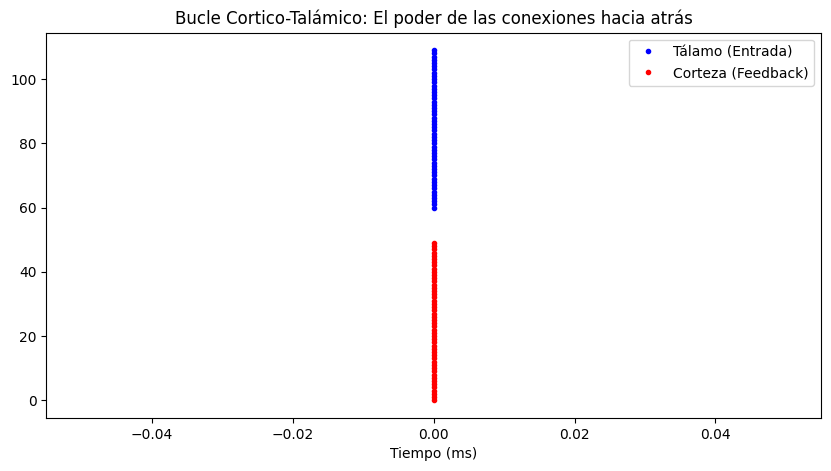

In [1]:
from brian2 import *

start_scope()

# Unidades: Tálamo (Entrada) y Corteza (Procesamiento)
n = 50
tau = 20*ms

# Neuronas con una variable de "excitabilidad" modulada por feedback
eqs = '''
dv/dt = (v_rest - v + g_feedback*(v_target - v) + I_ext) / tau : volt
g_feedback : 1  # Modulación desde la corteza
v_rest = -70*mV : volt
v_target = -50*mV : volt
I_ext : volt
'''

Talamo = NeuronGroup(n, eqs, threshold='v>-50*mV', reset='v=-80*mV', method='exact')
Corteza = NeuronGroup(n, eqs, threshold='v>-50*mV', reset='v=-80*mV', method='exact')

# 1. Forward Projection (Tálamo -> Corteza)
S_forward = Synapses(Talamo, Corteza, on_pre='v_post += 5*mV')
S_forward.connect(p=0.2)

# 2. Back-projection (Corteza -> Tálamo)
# En lugar de disparar, la corteza aumenta la excitabilidad del tálamo (g_feedback)
S_backward = Synapses(Corteza, Talamo, on_pre='g_feedback_post += 0.2')
S_backward.connect(p=0.4)

# Monitores
mT = SpikeMonitor(Talamo)
mC = SpikeMonitor(Corteza)

# Simulamos entrada al tálamo
Talamo.I_ext = 18*mV
run(200*ms)

# Visualización: Verás cómo la actividad aumenta cuando el feedback empieza a sumar
plt.figure(figsize=(10, 5))
plt.plot(mT.t/ms, mT.i + 60, '.b', label='Tálamo (Entrada)')
plt.plot(mC.t/ms, mC.i, '.r', label='Corteza (Feedback)')
plt.title('Bucle Cortico-Talámico: El poder de las conexiones hacia atrás')
plt.xlabel('Tiempo (ms)')
plt.legend()
plt.show()